In [62]:
import pandas as pd
import glob

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

from experiments_core import run_tests_splits
from experiments_core import run_one_experiment
from experiments_core import print_baseline_results
from experiments_core import default_tokenize
from experiments_core import tokenize_stems
from experiments_core import tokenize_lemmas
from experiments_core import tokenize_no_urls
from experiments_core import tokenize_norm_letters
from experiments_core import save_excel_results

from nltk.corpus import stopwords

%matplotlib inline

In [63]:
import importlib
import sys
importlib.reload(sys.modules[run_tests_splits.__module__])
importlib.reload(sys.modules[run_one_experiment.__module__])
importlib.reload(sys.modules[print_baseline_results.__module__])
importlib.reload(sys.modules[default_tokenize.__module__])
importlib.reload(sys.modules[tokenize_stems.__module__])
importlib.reload(sys.modules[tokenize_lemmas.__module__])
importlib.reload(sys.modules[tokenize_no_urls.__module__])
importlib.reload(sys.modules[tokenize_norm_letters.__module__])
importlib.reload(sys.modules[save_excel_results.__module__])

<module 'experiments_core' from '/home/ctorres9/EAFIT/trabajogrado/experiments/experiments_core.py'>

In [4]:
files_path = 'data/satirical_real_news_tweets/'
all_files = glob.glob(files_path + "/*.csv")
print("Numero de archivos:", len(all_files))
original_news_df = pd.DataFrame()
files_list = []
for file in all_files:
    df = pd.read_csv(file, index_col=None, header=0, sep='\t')
    files_list.append(df)
original_news_df = pd.concat(files_list, ignore_index=True)
original_news_df = original_news_df.drop(columns=['Unnamed: 0'])
print(original_news_df.describe())
print(original_news_df.head())

Numero de archivos: 16
                                                     text target
count                                               10000  10000
unique                                               9992      2
top     Sánchez desconcierta al PSOE con su «mano tend...   fake
freq                                                    2   5000
                                                text target
0  Las lágrimas de un niño con autismo en un conc...   real
1  Vender carne de mono por ternera https://t.co/...   real
2  #Psicología Si buscas olvido en internet, verá...   real
3  El cantante congoleño Papa Wemba fallece en pl...   real
4  #Lomásvisto Vender carne de mono por ternera h...   real


In [5]:
total_data_content = original_news_df.text
total_data_target = original_news_df.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(total_data_content, 
                                                    total_data_target, 
                                                    test_size=0.3, 
                                                    random_state=70)

In [7]:
print("Reales entrenamiento:", len(y_train[y_train == 'real']))
print("Fakes entrenamiento:", len(y_train[y_train == 'fake']))
print("Reales pruebas:", len(y_test[y_test == 'real']))
print("Fakes pruebas:", len(y_test[y_test == 'fake']))

Reales entrenamiento: 3525
Fakes entrenamiento: 3475
Reales pruebas: 1475
Fakes pruebas: 1525


# Experimentos con el clasificador SVM lineal
Los siguientes son los experimentos realizados para el clasificador SVM con kernel radial y con los diferentes metodos de ponderación para el modelo de espacio vectorial.

# Linea base

In [8]:
tf_vect_baseline = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True)

tf_idf_vect_baseline = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True)

binary_vect_baseline = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True)

In [9]:
parameters_svm_lineal = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

## Linea base y parametros optimos SVM Lineal

### TF BaseLine

In [10]:
%%time
tf_baseline_results = run_tests_splits(total_data_content, total_data_target, tf_vect_baseline, parameters_svm_lineal, LinearSVC())

random state:  10
train time: 2.618s
random state:  20
train time: 2.475s
random state:  30
train time: 2.657s
random state:  40
train time: 2.616s
random state:  50
train time: 2.759s
random state:  60
train time: 2.568s
random state:  70
train time: 2.785s
random state:  80
train time: 2.324s
random state:  90
train time: 2.494s
random state:  100
train time: 2.627s
CPU times: user 9.44 s, sys: 6.61 s, total: 16.1 s
Wall time: 29.1 s


Numero de caracteristicas:  (7000, 23367)

Best score selected:  0.8858571428571429
Best Accuracy:  0.885
Best Best F1-score:  0.8848063594903033
Best random state:  90
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8858571428571429
C: 0.1


Exactitud: 0.885
F1_score: 0.8848063594903033
Precision: 0.8854046492718685
Recall: 0.8845401831323758

             precision    recall  f1-score   support

       fake     0.8928    0.8677    0.8801      1459
       real     0.8780    0.9014    0.8895      1541

avg / total     0.8852    0.8850    0.8849      3000

[[1266  193]
 [ 152 1389]]

Confusion matrix, without normalization
[[1266  193]
 [ 152 1389]]


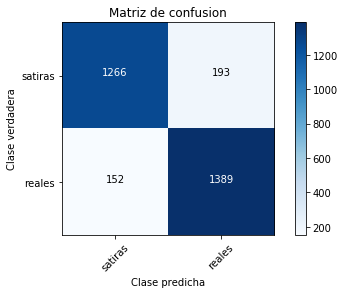

In [11]:
print_baseline_results(tf_baseline_results, parameters_svm_lineal)

### TF-IDF BaseLine

In [12]:
%%time
tf_idf_baseline_results = run_tests_splits(total_data_content, total_data_target, tf_idf_vect_baseline, parameters_svm_lineal, LinearSVC())

random state:  10
train time: 2.595s
random state:  20
train time: 3.400s
random state:  30
train time: 2.565s
random state:  40
train time: 3.516s
random state:  50
train time: 2.773s
random state:  60
train time: 2.722s
random state:  70
train time: 2.782s
random state:  80
train time: 2.678s
random state:  90
train time: 2.512s
random state:  100
train time: 2.644s
CPU times: user 10.6 s, sys: 6.83 s, total: 17.4 s
Wall time: 31.4 s


Numero de caracteristicas:  (7000, 23353)

Best score selected:  0.887
Best Accuracy:  0.8796666666666667
Best Best F1-score:  0.8794506287991
Best random state:  20
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.887
C: 100


Exactitud: 0.8796666666666667
F1_score: 0.8794506287991
Precision: 0.8821958414480466
Recall: 0.8795855183420733

             precision    recall  f1-score   support

       fake     0.9128    0.8390    0.8743      1497
       real     0.8516    0.9202    0.8846      1503

avg / total     0.8821    0.8797    0.8795      3000

[[1256  241]
 [ 120 1383]]

Confusion matrix, without normalization
[[1256  241]
 [ 120 1383]]


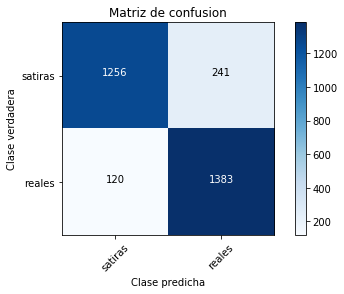

In [17]:
print_baseline_results(tf_idf_baseline_results, parameters_svm_lineal)

### Binary BaseLine

In [14]:
%%time
binary_baseline_results = run_tests_splits(total_data_content, total_data_target, binary_vect_baseline, parameters_svm_lineal, LinearSVC())

random state:  10
train time: 2.514s
random state:  20
train time: 2.437s
random state:  30
train time: 2.721s
random state:  40
train time: 2.848s
random state:  50
train time: 3.359s
random state:  60
train time: 2.412s
random state:  70
train time: 2.393s
random state:  80
train time: 2.478s
random state:  90
train time: 2.517s
random state:  100
train time: 2.628s
CPU times: user 9.4 s, sys: 7.18 s, total: 16.6 s
Wall time: 29.4 s


Numero de caracteristicas:  (7000, 23290)

Best score selected:  0.8817142857142857
Best Accuracy:  0.8803333333333333
Best Best F1-score:  0.880293098513667
Best random state:  100
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8817142857142857
C: 0.1


Exactitud: 0.8803333333333333
F1_score: 0.880293098513667
Precision: 0.8807281217086953
Recall: 0.8802907042894528

             precision    recall  f1-score   support

       fake     0.8923    0.8643    0.8781      1496
       real     0.8691    0.8963    0.8825      1504

avg / total     0.8807    0.8803    0.8803      3000

[[1293  203]
 [ 156 1348]]

Confusion matrix, without normalization
[[1293  203]
 [ 156 1348]]


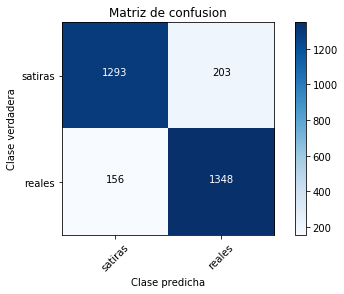

In [15]:
print_baseline_results(binary_baseline_results, parameters_svm_lineal)

In [66]:
all_experiments_results = []

## Prueba de la linea base con los parametros optimos
Esta prueba se hace para validar los resultados obtenidos anteriormente. Si esta bien debe dar lo mismo o un resultado muy similar dependiendo del clasificador.

### TF BaseLine

Numero de caracteristicas:  (7000, 23367)

train time: 2.068s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8858571428571429
C: 0.1

Exactitud: 0.885
F1_score: 0.8848063594903033
Precision: 0.8854046492718685
Recall: 0.8845401831323758

             precision    recall  f1-score   support

       fake     0.8928    0.8677    0.8801      1459
       real     0.8780    0.9014    0.8895      1541

avg / total     0.8852    0.8850    0.8849      3000

[[1266  193]
 [ 152 1389]]

Confusion matrix, without normalization
[[1266  193]
 [ 152 1389]]
CPU times: user 964 ms, sys: 1.38 s, total: 2.35 s
Wall time: 2.57 s


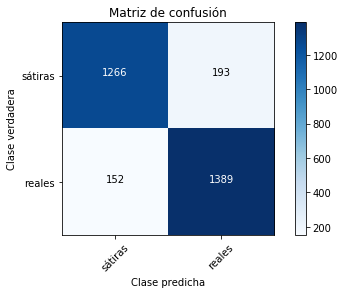

In [67]:
%%time
optimal_parameters = {'C': [0.1]}
clf_tf_vect_baseline = run_one_experiment(total_data_content, total_data_target, tf_vect_baseline, optimal_parameters, LinearSVC(), 90)
all_experiments_results.append(clf_tf_vect_baseline)

### TF-IDF BaseLine

Numero de caracteristicas:  (7000, 23353)

train time: 3.467s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.887
C: 100

Exactitud: 0.8796666666666667
F1_score: 0.8794506287991
Precision: 0.8821958414480466
Recall: 0.8795855183420733

             precision    recall  f1-score   support

       fake     0.9128    0.8390    0.8743      1497
       real     0.8516    0.9202    0.8846      1503

avg / total     0.8821    0.8797    0.8795      3000

[[1256  241]
 [ 120 1383]]

Confusion matrix, without normalization
[[1256  241]
 [ 120 1383]]
CPU times: user 1.6 s, sys: 1.64 s, total: 3.24 s
Wall time: 3.89 s


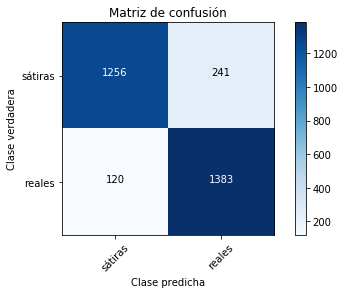

In [68]:
%%time
optimal_parameters = {'C': [100]}
clf_tf_idf_vect_baseline = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_baseline, optimal_parameters, LinearSVC(), 20)
all_experiments_results.append(clf_tf_idf_vect_baseline)

### Binary BaseLine

Numero de caracteristicas:  (7000, 23290)

train time: 2.069s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8817142857142857
C: 0.1

Exactitud: 0.8803333333333333
F1_score: 0.880293098513667
Precision: 0.8807281217086953
Recall: 0.8802907042894528

             precision    recall  f1-score   support

       fake     0.8923    0.8643    0.8781      1496
       real     0.8691    0.8963    0.8825      1504

avg / total     0.8807    0.8803    0.8803      3000

[[1293  203]
 [ 156 1348]]

Confusion matrix, without normalization
[[1293  203]
 [ 156 1348]]
CPU times: user 1 s, sys: 1.45 s, total: 2.45 s
Wall time: 2.49 s


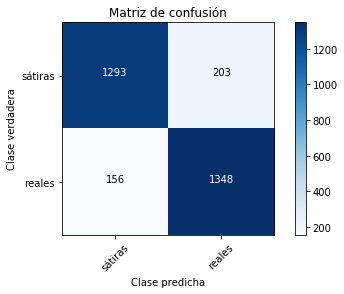

In [69]:
%%time
optimal_parameters = {'C': [0.1]}
clf_binary_vect_baseline = run_one_experiment(total_data_content, total_data_target, binary_vect_baseline, optimal_parameters, LinearSVC(), 100)
all_experiments_results.append(clf_binary_vect_baseline)

## Experimento 1: Remocion de stop words

In [70]:
spanish_stopwords = stopwords.words('spanish')

In [71]:
tf_vect_stopwords = CountVectorizer(stop_words = spanish_stopwords,
                                    analyzer = 'word',
                                    tokenizer = default_tokenize,
                                    lowercase = True)
tf_idf_vect_stopwords = TfidfVectorizer(stop_words = spanish_stopwords,
                                        analyzer = 'word',
                                        tokenizer = default_tokenize,
                                        lowercase = True)
binary_vect_stopwords = CountVectorizer(stop_words = spanish_stopwords,
                                        analyzer = 'word',
                                        tokenizer = default_tokenize,
                                        lowercase = True,
                                        binary=True)

### TF stop words

Numero de caracteristicas:  (7000, 23179)

train time: 1.814s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8817142857142857
C: 0.1

Exactitud: 0.8816666666666667
F1_score: 0.8814985394277726
Precision: 0.8818905424765326
Recall: 0.8812955367988261

             precision    recall  f1-score   support

       fake     0.8866    0.8677    0.8770      1459
       real     0.8772    0.8949    0.8860      1541

avg / total     0.8818    0.8817    0.8816      3000

[[1266  193]
 [ 162 1379]]

Confusion matrix, without normalization
[[1266  193]
 [ 162 1379]]
CPU times: user 952 ms, sys: 1.24 s, total: 2.2 s
Wall time: 2.29 s


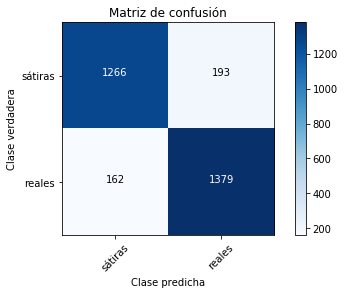

In [72]:
%%time
optimal_parameters = {'C': [0.1]}
clf_tf_vect_stopwords = run_one_experiment(total_data_content, total_data_target, tf_vect_stopwords, optimal_parameters, LinearSVC(), 90)
all_experiments_results.append(clf_tf_vect_stopwords)

### TF-IDF stop words

Numero de caracteristicas:  (7000, 23161)

train time: 3.002s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8762857142857143
C: 100

Exactitud: 0.871
F1_score: 0.8707224698711533
Precision: 0.8739836451110999
Recall: 0.8709108169766012

             precision    recall  f1-score   support

       fake     0.9069    0.8263    0.8647      1497
       real     0.8411    0.9155    0.8767      1503

avg / total     0.8739    0.8710    0.8707      3000

[[1237  260]
 [ 127 1376]]

Confusion matrix, without normalization
[[1237  260]
 [ 127 1376]]
CPU times: user 1.55 s, sys: 1.47 s, total: 3.02 s
Wall time: 3.46 s


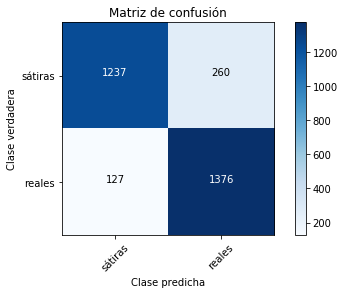

In [73]:
%%time
optimal_parameters = {'C': [100]}
clf_tf_idf_vect_stopwords = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_stopwords, optimal_parameters, LinearSVC(), 20)
all_experiments_results.append(clf_tf_idf_vect_stopwords)

### Binary stop words

Numero de caracteristicas:  (7000, 23100)

train time: 2.129s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8795714285714286
C: 0.1

Exactitud: 0.875
F1_score: 0.8749259422607008
Precision: 0.8757337192165289
Recall: 0.8749413329161452

             precision    recall  f1-score   support

       fake     0.8917    0.8529    0.8719      1496
       real     0.8598    0.8969    0.8780      1504

avg / total     0.8757    0.8750    0.8749      3000

[[1276  220]
 [ 155 1349]]

Confusion matrix, without normalization
[[1276  220]
 [ 155 1349]]
CPU times: user 976 ms, sys: 1.66 s, total: 2.64 s
Wall time: 2.61 s


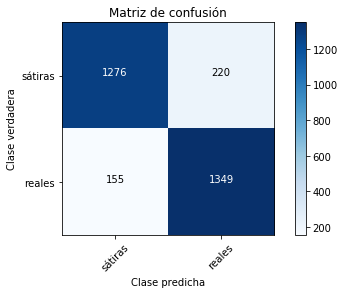

In [74]:
%%time
optimal_parameters = {'C': [0.1]}
clf_binary_vect_stopwords = run_one_experiment(total_data_content, total_data_target, binary_vect_stopwords, optimal_parameters, LinearSVC(), 100)
all_experiments_results.append(clf_binary_vect_stopwords)

## Experimento 2: Stemming

In [75]:
#Prueba tokenize_stems
print(tokenize_stems(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaa', 'com', 'estas', 'estaa', 'cre', 'en', 'mi', 'si', 'llov', 'mañan', 'tu', 'cre', 'en', 'mi', 'cart', 'aeiou']


In [76]:
tf_vect_stemming = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True)

tf_idf_vect_stemming = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True)

binary_vect_stemming = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True,
                binary=True)

### TF stemming

Numero de caracteristicas:  (7000, 17699)

train time: 2.111s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8795714285714286
C: 0.1

Exactitud: 0.8836666666666667
F1_score: 0.8834444210789039
Precision: 0.8842298942860967
Recall: 0.8831329095204017

             precision    recall  f1-score   support

       fake     0.8936    0.8636    0.8784      1459
       real     0.8748    0.9027    0.8885      1541

avg / total     0.8840    0.8837    0.8836      3000

[[1260  199]
 [ 150 1391]]

Confusion matrix, without normalization
[[1260  199]
 [ 150 1391]]
CPU times: user 5.4 s, sys: 1.41 s, total: 6.81 s
Wall time: 6.98 s


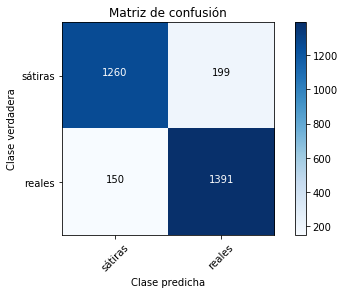

In [77]:
%%time
optimal_parameters = {'C': [0.1]}
clf_tf_vect_stemming = run_one_experiment(total_data_content, total_data_target, tf_vect_stemming, optimal_parameters, LinearSVC(), 90)
all_experiments_results.append(clf_tf_vect_stemming)

### TF-IDF stemming

Numero de caracteristicas:  (7000, 17652)

train time: 3.430s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8767142857142857
C: 100

Exactitud: 0.8763333333333333
F1_score: 0.8761113110373022
Precision: 0.8788395721159354
Recall: 0.8762521716753533

             precision    recall  f1-score   support

       fake     0.9092    0.8357    0.8709      1497
       real     0.8485    0.9168    0.8814      1503

avg / total     0.8788    0.8763    0.8761      3000

[[1251  246]
 [ 125 1378]]

Confusion matrix, without normalization
[[1251  246]
 [ 125 1378]]
CPU times: user 5.77 s, sys: 1.64 s, total: 7.4 s
Wall time: 8.12 s


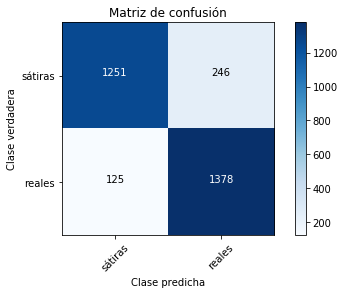

In [78]:
%%time
optimal_parameters = {'C': [100]}
clf_tf_idf_vect_stemming = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_stemming, optimal_parameters, LinearSVC(), 20)
all_experiments_results.append(clf_tf_idf_vect_stemming)

### Binary stemming

Numero de caracteristicas:  (7000, 17609)

train time: 2.210s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8725714285714286
C: 0.1

Exactitud: 0.8726666666666667
F1_score: 0.872655573552185
Precision: 0.8727407549666049
Recall: 0.8726479832745477

             precision    recall  f1-score   support

       fake     0.8774    0.8656    0.8715      1496
       real     0.8681    0.8797    0.8738      1504

avg / total     0.8727    0.8727    0.8727      3000

[[1295  201]
 [ 181 1323]]

Confusion matrix, without normalization
[[1295  201]
 [ 181 1323]]
CPU times: user 5.08 s, sys: 1.6 s, total: 6.69 s
Wall time: 6.77 s


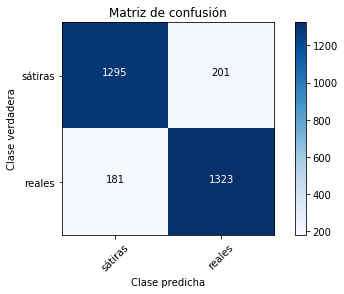

In [79]:
%%time
optimal_parameters = {'C': [0.1]}
clf_binary_vect_stemming = run_one_experiment(total_data_content, total_data_target, binary_vect_stemming, optimal_parameters, LinearSVC(), 100)
all_experiments_results.append(clf_binary_vect_stemming)

## Experimento 3: Lematizacion

In [80]:
# Prueba del tokenizer
print(tokenize_lemmas(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaaa', 'comer', 'este', 'estaaaas', 'creer', 'en', 'mi', 'si', 'llover', 'mañana', 'tu', 'creer', 'en', 'mi', 'carta', 'aeiou']


In [81]:
tf_vect_lemmatize = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True)

tf_idf_vect_lemmatize = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True)

binary_vect_lemmatize = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True,
                binary=True)

### TF lemmatize

Numero de caracteristicas:  (7000, 18693)

train time: 2.158s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8815714285714286
C: 0.1

Exactitud: 0.88
F1_score: 0.8798012179252889
Precision: 0.8803711623092939
Recall: 0.8795455627070714

             precision    recall  f1-score   support

       fake     0.8872    0.8629    0.8749      1459
       real     0.8735    0.8962    0.8847      1541

avg / total     0.8802    0.8800    0.8799      3000

[[1259  200]
 [ 160 1381]]

Confusion matrix, without normalization
[[1259  200]
 [ 160 1381]]
CPU times: user 1.19 s, sys: 1.47 s, total: 2.66 s
Wall time: 2.79 s


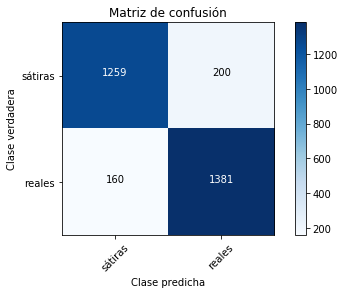

In [82]:
%%time
optimal_parameters = {'C': [0.1]}
clf_tf_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, tf_vect_lemmatize, optimal_parameters, LinearSVC(), 90)
all_experiments_results.append(clf_tf_vect_lemmatize)

### TF-IDF lemmatize

Numero de caracteristicas:  (7000, 18690)

train time: 3.346s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8755714285714286
C: 100

Exactitud: 0.8746666666666667
F1_score: 0.8744854236183716
Precision: 0.8766552307100348
Recall: 0.8745941650433269

             precision    recall  f1-score   support

       fake     0.9035    0.8383    0.8697      1497
       real     0.8498    0.9108    0.8793      1503

avg / total     0.8766    0.8747    0.8745      3000

[[1255  242]
 [ 134 1369]]

Confusion matrix, without normalization
[[1255  242]
 [ 134 1369]]
CPU times: user 1.69 s, sys: 1.54 s, total: 3.22 s
Wall time: 3.91 s


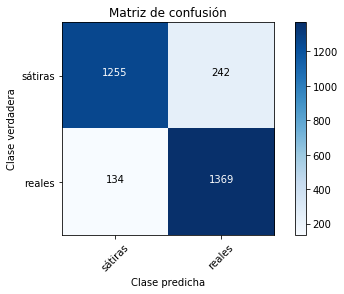

In [83]:
%%time
optimal_parameters = {'C': [100]}
clf_tf_idf_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_lemmatize, optimal_parameters, LinearSVC(), 20)
all_experiments_results.append(clf_tf_idf_vect_lemmatize)

### Binary lemmatize

Numero de caracteristicas:  (7000, 18627)

train time: 2.097s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8737142857142857
C: 0.1

Exactitud: 0.874
F1_score: 0.873990535289095
Precision: 0.8740609091022247
Recall: 0.8739831038798498

             precision    recall  f1-score   support

       fake     0.8782    0.8676    0.8729      1496
       real     0.8699    0.8803    0.8751      1504

avg / total     0.8740    0.8740    0.8740      3000

[[1298  198]
 [ 180 1324]]

Confusion matrix, without normalization
[[1298  198]
 [ 180 1324]]
CPU times: user 1.06 s, sys: 1.53 s, total: 2.59 s
Wall time: 2.69 s


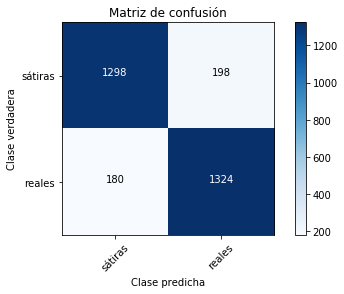

In [84]:
%%time
optimal_parameters = {'C': [0.1]}
clf_binary_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, binary_vect_lemmatize, optimal_parameters, LinearSVC(), 100)
all_experiments_results.append(clf_binary_vect_lemmatize)

## Experimento 4: Remocion de URLs

In [85]:
# Prueba de la tokenizacion sin urls
print(tokenize_no_urls(
    "holaaaa cómo http://estas creerías https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python mi si lloviera \t  mañana, tu crees en mi cartas ¡¡ ¿¿. aeiou"))

['holaaaa', 'cómo', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [86]:
tf_vect_no_urls = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True)

tf_idf_vect_no_urls = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True)

binary_vect_no_urls = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True,
                binary=True)

### TF sin URLs

Numero de caracteristicas:  (7000, 15609)

train time: 2.163s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8505714285714285
C: 0.1

Exactitud: 0.8453333333333334
F1_score: 0.8453234340331115
Precision: 0.845532603965576
Recall: 0.845746533298878

             precision    recall  f1-score   support

       fake     0.8279    0.8609    0.8441      1459
       real     0.8631    0.8306    0.8466      1541

avg / total     0.8460    0.8453    0.8454      3000

[[1256  203]
 [ 261 1280]]

Confusion matrix, without normalization
[[1256  203]
 [ 261 1280]]
CPU times: user 1.07 s, sys: 1.52 s, total: 2.59 s
Wall time: 2.68 s


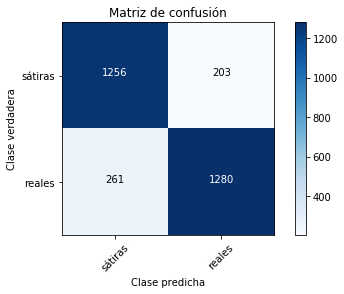

In [87]:
%%time
optimal_parameters = {'C': [0.1]}
clf_tf_vect_no_urls = run_one_experiment(total_data_content, total_data_target, tf_vect_no_urls, optimal_parameters, LinearSVC(), 90)
all_experiments_results.append(clf_tf_vect_no_urls)

### TF-IDF sin URLs

Numero de caracteristicas:  (7000, 15606)

train time: 3.364s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.84
C: 100

Exactitud: 0.846
F1_score: 0.8459999315555251
Precision: 0.8460071778575318
Recall: 0.8460047173522027

             precision    recall  f1-score   support

       fake     0.8439    0.8484    0.8461      1497
       real     0.8482    0.8436    0.8459      1503

avg / total     0.8460    0.8460    0.8460      3000

[[1270  227]
 [ 235 1268]]

Confusion matrix, without normalization
[[1270  227]
 [ 235 1268]]
CPU times: user 1.65 s, sys: 1.53 s, total: 3.18 s
Wall time: 3.86 s


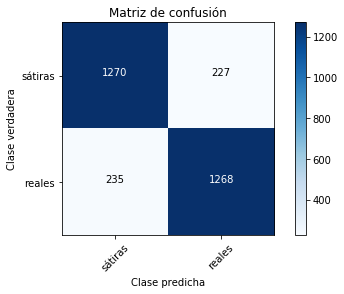

In [88]:
%%time
optimal_parameters = {'C': [100]}
clf_tf_idf_vect_no_urls = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_no_urls, optimal_parameters, LinearSVC(), 20)
all_experiments_results.append(clf_tf_idf_vect_no_urls)

### Binary sin URLs

Numero de caracteristicas:  (7000, 15538)

train time: 2.088s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8487142857142858
C: 0.1

Exactitud: 0.8513333333333334
F1_score: 0.8512523485008505
Precision: 0.8522564249702833
Recall: 0.8514016099670042

             precision    recall  f1-score   support

       fake     0.8335    0.8770    0.8547      1496
       real     0.8710    0.8258    0.8478      1504

avg / total     0.8523    0.8513    0.8512      3000

[[1312  184]
 [ 262 1242]]

Confusion matrix, without normalization
[[1312  184]
 [ 262 1242]]
CPU times: user 948 ms, sys: 1.49 s, total: 2.44 s
Wall time: 2.52 s


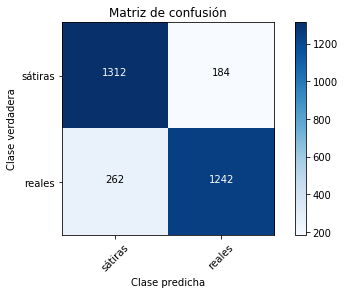

In [89]:
%%time
optimal_parameters = {'C': [0.1]}
clf_binary_vect_no_urls = run_one_experiment(total_data_content, total_data_target, binary_vect_no_urls, optimal_parameters, LinearSVC(), 100)
all_experiments_results.append(clf_binary_vect_no_urls)

## Experimento 5: Remocion de letras repetidas

In [90]:
print(tokenize_norm_letters(
    "holaaaa cómo http://estas estaaaas creerías mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['hola', 'cómo', 'htp', 'estas', 'estas', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [91]:
tf_vect_norm_letters = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True)

tf_idf_vect_norm_letters = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True)

binary_vect_norm_letters = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True,
                binary=True)

### TF sin letras repetidas

Numero de caracteristicas:  (7000, 23288)

train time: 2.126s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.885
C: 0.1

Exactitud: 0.885
F1_score: 0.8847803016396041
Precision: 0.8855680449618627
Recall: 0.8844672397466729

             precision    recall  f1-score   support

       fake     0.8950    0.8650    0.8797      1459
       real     0.8761    0.9040    0.8898      1541

avg / total     0.8853    0.8850    0.8849      3000

[[1262  197]
 [ 148 1393]]

Confusion matrix, without normalization
[[1262  197]
 [ 148 1393]]
CPU times: user 2.24 s, sys: 1.4 s, total: 3.63 s
Wall time: 3.87 s


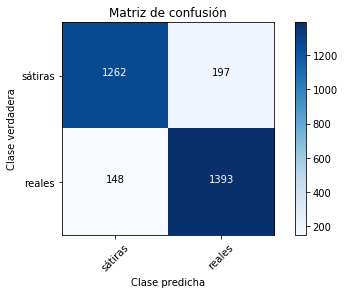

In [92]:
%%time
optimal_parameters = {'C': [0.1]}
clf_tf_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, tf_vect_norm_letters, optimal_parameters, LinearSVC(), 90)
all_experiments_results.append(clf_tf_vect_norm_letters)

### TF-IDF sin letras repetidas

Numero de caracteristicas:  (7000, 23276)

train time: 3.470s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8875714285714286
C: 100

Exactitud: 0.8783333333333333
F1_score: 0.8781149016943809
Precision: 0.8808533337152022
Recall: 0.8782521796753853

             precision    recall  f1-score   support

       fake     0.9113    0.8377    0.8730      1497
       real     0.8504    0.9188    0.8833      1503

avg / total     0.8808    0.8783    0.8781      3000

[[1254  243]
 [ 122 1381]]

Confusion matrix, without normalization
[[1254  243]
 [ 122 1381]]
CPU times: user 2.97 s, sys: 1.54 s, total: 4.51 s
Wall time: 5.32 s


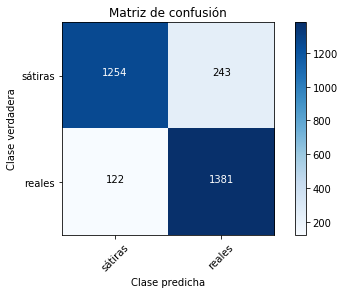

In [93]:
%%time
optimal_parameters = {'C': [100]}
clf_tf_idf_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_norm_letters, optimal_parameters, LinearSVC(), 20)
all_experiments_results.append(clf_tf_idf_vect_norm_letters)

### Binary sin letras repetidas

Numero de caracteristicas:  (7000, 23208)

train time: 2.397s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8808571428571429
C: 0.1

Exactitud: 0.8803333333333333
F1_score: 0.880293098513667
Precision: 0.8807281217086953
Recall: 0.8802907042894528

             precision    recall  f1-score   support

       fake     0.8923    0.8643    0.8781      1496
       real     0.8691    0.8963    0.8825      1504

avg / total     0.8807    0.8803    0.8803      3000

[[1293  203]
 [ 156 1348]]

Confusion matrix, without normalization
[[1293  203]
 [ 156 1348]]
CPU times: user 2.43 s, sys: 1.66 s, total: 4.09 s
Wall time: 4.2 s


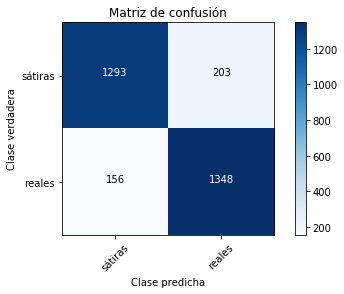

In [94]:
%%time
optimal_parameters = {'C': [0.1]}
clf_binary_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, binary_vect_norm_letters, optimal_parameters, LinearSVC(), 100)
all_experiments_results.append(clf_binary_vect_norm_letters)

## Experimento 6: Remocion de terminos poco comunes (pruning < 10)

In [95]:
tf_vect_pruning10 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=10)

tf_idf_vect_pruning10 = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=10)

binary_vect_pruning10 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True,
                min_df=10)

### TF pruning < 10

Numero de caracteristicas:  (7000, 1218)

train time: 2.122s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8517142857142858
C: 0.1

Exactitud: 0.8503333333333334
F1_score: 0.8500894622017885
Precision: 0.850601711535033
Recall: 0.8498658330957485

             precision    recall  f1-score   support

       fake     0.8556    0.8328    0.8440      1459
       real     0.8456    0.8670    0.8561      1541

avg / total     0.8505    0.8503    0.8503      3000

[[1215  244]
 [ 205 1336]]

Confusion matrix, without normalization
[[1215  244]
 [ 205 1336]]
CPU times: user 1.08 s, sys: 1.48 s, total: 2.56 s
Wall time: 2.61 s


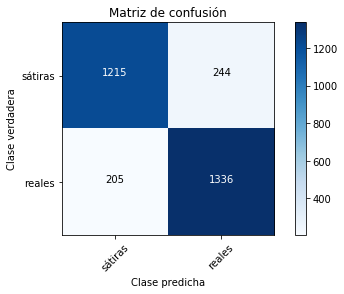

In [96]:
%%time
optimal_parameters = {'C': [0.1]}
clf_tf_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, tf_vect_pruning10, optimal_parameters, LinearSVC(), 90)
all_experiments_results.append(clf_tf_vect_pruning10)

### TF-IDF pruning < 10

Numero de caracteristicas:  (7000, 1214)

train time: 2.765s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8261428571428572
C: 100

Exactitud: 0.812
F1_score: 0.811997911087901
Precision: 0.8120321037446813
Recall: 0.8120099147063256

             precision    recall  f1-score   support

       fake     0.8083    0.8170    0.8126      1497
       real     0.8157    0.8071    0.8114      1503

avg / total     0.8120    0.8120    0.8120      3000

[[1223  274]
 [ 290 1213]]

Confusion matrix, without normalization
[[1223  274]
 [ 290 1213]]
CPU times: user 1.42 s, sys: 1.63 s, total: 3.04 s
Wall time: 3.34 s


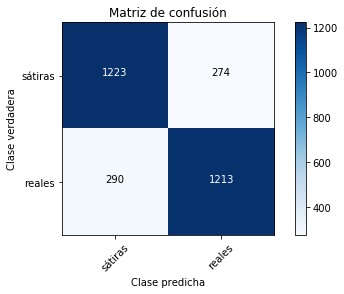

In [97]:
%%time
optimal_parameters = {'C': [100]}
clf_tf_idf_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_pruning10, optimal_parameters, LinearSVC(), 20)
all_experiments_results.append(clf_tf_idf_vect_pruning10)

### Binary pruning < 10

Numero de caracteristicas:  (7000, 1215)

train time: 2.041s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8518571428571429
C: 0.1

Exactitud: 0.841
F1_score: 0.8408336003717665
Precision: 0.8422328765106403
Recall: 0.8409197576516099

             precision    recall  f1-score   support

       fake     0.8621    0.8108    0.8357      1496
       real     0.8223    0.8710    0.8460      1504

avg / total     0.8422    0.8410    0.8408      3000

[[1213  283]
 [ 194 1310]]

Confusion matrix, without normalization
[[1213  283]
 [ 194 1310]]
CPU times: user 1.04 s, sys: 1.54 s, total: 2.58 s
Wall time: 2.58 s


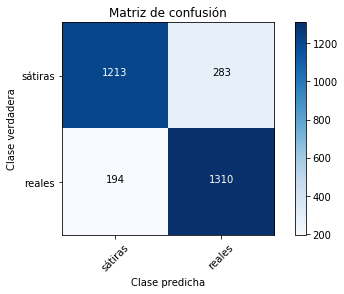

In [98]:
%%time
optimal_parameters = {'C': [0.1]}
clf_binary_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, binary_vect_pruning10, optimal_parameters, LinearSVC(), 100)
all_experiments_results.append(clf_binary_vect_pruning10)

## Experimento 7: Remocion de terminos poco comunes (pruning < 5)

In [99]:
tf_vect_pruning5 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=5)

tf_idf_vect_pruning5 = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=5)

binary_vect_pruning5 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True,
                min_df=5)

### TF pruning < 5

Numero de caracteristicas:  (7000, 2643)

train time: 2.187s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8731428571428571
C: 0.1

Exactitud: 0.8663333333333333
F1_score: 0.8661297166323312
Precision: 0.8665819454742485
Recall: 0.8659142675038551

             precision    recall  f1-score   support

       fake     0.8715    0.8506    0.8609      1459
       real     0.8617    0.8812    0.8714      1541

avg / total     0.8664    0.8663    0.8663      3000

[[1241  218]
 [ 183 1358]]

Confusion matrix, without normalization
[[1241  218]
 [ 183 1358]]
CPU times: user 1.01 s, sys: 1.52 s, total: 2.54 s
Wall time: 2.69 s


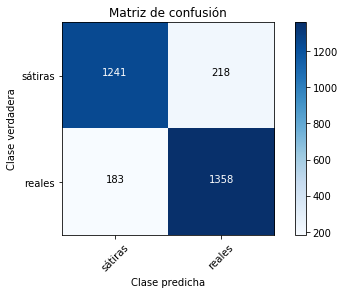

In [100]:
%%time
optimal_parameters = {'C': [0.1]}
clf_tf_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, tf_vect_pruning5, optimal_parameters, LinearSVC(), 90)
all_experiments_results.append(clf_tf_vect_pruning5)

### TF-IDF pruning < 5

Numero de caracteristicas:  (7000, 2658)

train time: 2.772s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.818
C: 100

Exactitud: 0.8086666666666666
F1_score: 0.808604654574749
Precision: 0.8091510808273814
Recall: 0.8087059014902727

             precision    recall  f1-score   support

       fake     0.7964    0.8283    0.8120      1497
       real     0.8219    0.7891    0.8052      1503

avg / total     0.8092    0.8087    0.8086      3000

[[1240  257]
 [ 317 1186]]

Confusion matrix, without normalization
[[1240  257]
 [ 317 1186]]
CPU times: user 1.34 s, sys: 1.67 s, total: 3.01 s
Wall time: 3.3 s


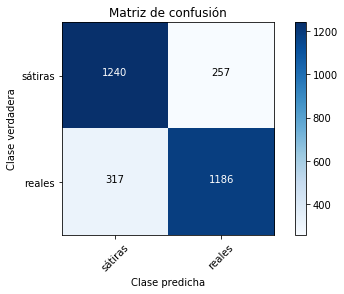

In [101]:
%%time
optimal_parameters = {'C': [100]}
clf_tf_idf_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_pruning5, optimal_parameters, LinearSVC(), 20)
all_experiments_results.append(clf_tf_idf_vect_pruning5)

### Binary pruning < 5

Numero de caracteristicas:  (7000, 2623)

train time: 2.429s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8658571428571429
C: 0.1

Exactitud: 0.8513333333333334
F1_score: 0.8512523485008505
Precision: 0.8519560535864099
Recall: 0.8512771646376152

             precision    recall  f1-score   support

       fake     0.8661    0.8302    0.8478      1496
       real     0.8378    0.8723    0.8547      1504

avg / total     0.8519    0.8513    0.8513      3000

[[1242  254]
 [ 192 1312]]

Confusion matrix, without normalization
[[1242  254]
 [ 192 1312]]
CPU times: user 1.12 s, sys: 1.9 s, total: 3.03 s
Wall time: 2.96 s


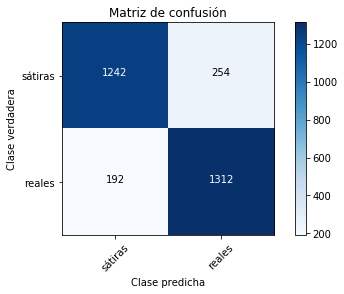

In [102]:
%%time
optimal_parameters = {'C': [0.1]}
clf_binary_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, binary_vect_pruning5, optimal_parameters, LinearSVC(), 100)
all_experiments_results.append(clf_binary_vect_pruning5)

In [103]:
len(all_experiments_results)

24

In [104]:
#save_excel_results('result_es_news_fakes_svm_lineal.xlsx', all_experiments_results)